In [85]:
#Habilitar intellisense
%config IPCompleter.greedy = True
%autosave 60

Autosaving every 60 seconds


In [86]:
%matplotlib inline

##  1 En un filtro antispam ¿prefeririría que sea más alta la presición o la exhaustividad? Justifique su respuesta.

Asuma que el filtro elimina cualquier mensaje que detecte como spam.

En este caso, **es más importante tener una alta precisión**. Porque una alta precisión significa que el número de falsos positivos es reducido. Es mucho peor tener un falso positivo que un falso negativo. Porque, digamos, si tengo un correo muy importante sobre trabajo y se lo marca como spam, es catastrófico. En cambio, si me llega un correo spam a mi bandeja de entrada, no es algo tan molesto.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [88]:
diabetes_df = pd.read_csv(os.path.join("datasets","diabetes.csv"))
diabetes_df.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
VARIABLES_INDEPENDIENTES = list(diabetes_df.columns[:-1])
VARIABLES_INDEPENDIENTES

['Pregnancies',
 'Glucose',
 'BP',
 'Skin Thickness',
 'Insulin',
 'Mass',
 'Pedigree',
 'Age']

## 2 Feature selection

En el siguiente problema de clasificación. Determine el porcentaje adecuado de variables aplicando la Información mutua. El valor a partir de cual un incremento en el mismo no incrementa significativamente el desempeño del clasificador (2% o menos)

In [90]:
from sklearn.feature_selection import mutual_info_classif, SelectPercentile

def seleccionar_variables(X, Y, porcentaje):
    X_as_float = X.astype(np.float64)
    select_features = SelectPercentile(mutual_info_classif, porcentaje)
    X_new = select_features.fit_transform(X_as_float, Y)
    return X_new

In [91]:
def datos_performance(performance_clasificador):   
    exactitud = [performance_clasificador[key]['exactitud'] for key in performance_clasificador]
    nro_variables = list(range (1, 100, 10))
       
    return pd.DataFrame(data={'exactitud' : exactitud}, index = nro_variables)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def evaluar_clasificador(variable_dependiente, 
                         variables_independientes, 
                         data_frame,
                         porcentaje):
    
    Y = data_frame[variable_dependiente] 
    X = seleccionar_variables(data_frame[variables_independientes], Y, porcentaje)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    clasificador = LogisticRegression(solver = 'liblinear')
    clasificador.fit(X_train, Y_train)

    return {'exactitud': accuracy_score(Y_test, clasificador.predict(X_test)), 
            'precision' : precision_score(Y_test, clasificador.predict(X_test)),
            'exhaustividad' : recall_score(Y_test, clasificador.predict(X_test))}

In [93]:
performance_clasificador = {}
    
for i in range (1, 100, 10):
    performance_clasificador['mutual_info_classif percentile - ' + str(i)] = evaluar_clasificador('class',
                                                   VARIABLES_INDEPENDIENTES,
                                                   diabetes_df,
                                                   i)

In [94]:
df = datos_performance(performance_clasificador)
df.head(10)

,exactitud
1,0.772727
11,0.779221
21,0.746753
31,0.766234
41,0.720779
51,0.740260
61,0.746753
71,0.792208
81,0.766234
91,0.746753


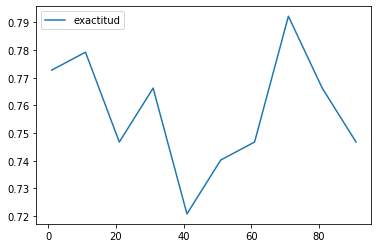

In [95]:
df.plot.line(rot=0)

**El porcentaje adecuado de variables es el 71%**. Con ese número de variables se tiene la mayor exactitud. Además, si se incrementa el valor (81%), se observa que la exactitud reduce. Y este valor tiene una diferencia de más del 2 por ciento que el valor inmediatamente anterior (61%).